In [1]:
# import some of the Libraries which will used through out the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)

### Information
Loading the dataset which was from https://www.livechennai.com/petrol_price.asp and the information of columns

Checking missing values and other

Handling the missing values

In [3]:
df = pd.read_csv('Chennai Petrol Prices in India for 4 years.csv')
df.head()

,Date,Price (Rs)
0,01-01-2019,71.22
1,02-01-2019,71.22
2,03-01-2019,71.22
3,04-01-2019,71.01
4,05-01-2019,70.85


In [4]:
# total columns
df.columns.tolist()

['Date', 'Price (Rs)']

In [5]:
# data type of columns
df.dtypes

Date           object
Price (Rs)    float64
dtype: object

In [6]:
# changing date to pd.datetime
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')
#date_sr.dt.strftime('%d,%m,%Y'

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Price (Rs)
0,2019-01-01,71.22
1,2019-01-02,71.22
2,2019-01-03,71.22
3,2019-01-04,71.01
4,2019-01-05,70.85


In [9]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1154 non-null   datetime64[ns]
 1   Price (Rs)  1154 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.2 KB


In [10]:
# description of dataset
df.describe(include="all")

<ipython-input-10-a2e2fb460d2f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Date,Price (Rs)
count,1154,1154.000000
unique,1151,NaN
top,2019-10-04 00:00:00,NaN
freq,2,NaN
first,2019-01-01 00:00:00,NaN
last,2022-02-25 00:00:00,NaN
mean,NaN,84.895121
std,NaN,10.687742
min,NaN,70.850000
25%,NaN,75.540000


In [11]:
# looking for unique values in each columns
for i in list(df.columns):
    print(f'Unique {i}:{df.nunique()}')

Unique Date:Date          1151
Price (Rs)     374
dtype: int64
Unique Price (Rs):Date          1151
Price (Rs)     374
dtype: int64


In [12]:
# checking for null values
df.isnull().sum()

Date          0
Price (Rs)    0
dtype: int64

No null values in the dataset

In [13]:
# Maximum value
df.max()

Date          2022-02-25 00:00:00
Price (Rs)                 109.98
dtype: object

In [14]:
#Minimum value
df.min()

Date          2019-01-01 00:00:00
Price (Rs)                  70.85
dtype: object

# EDA AND VISUALIZATION

In [15]:
#seperating days,weeks,months,etc
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.week
df['Month']  = df['Date'].dt.month_name()
df['dayname'] = df['Date'].dt.day_name() 

<ipython-input-15-2e4e3c75474d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


In [16]:
#checking
df.head()

,Date,Price (Rs),Year,Day,Week,Month,dayname
0,2019-01-01,71.22,2019,1,1,January,Tuesday
1,2019-01-02,71.22,2019,2,1,January,Wednesday
2,2019-01-03,71.22,2019,3,1,January,Thursday
3,2019-01-04,71.01,2019,4,1,January,Friday
4,2019-01-05,70.85,2019,5,1,January,Saturday


In [17]:
df['Year'].unique()

array([2019, 2020, 2021, 2022], dtype=int64)

Only these years in dataset

# Year: 2019

In [18]:
df19 = df[df['Year'] == 2019]

df19.head()

,Date,Price (Rs),Year,Day,Week,Month,dayname
0,2019-01-01,71.22,2019,1,1,January,Tuesday
1,2019-01-02,71.22,2019,2,1,January,Wednesday
2,2019-01-03,71.22,2019,3,1,January,Thursday
3,2019-01-04,71.01,2019,4,1,January,Friday
4,2019-01-05,70.85,2019,5,1,January,Saturday


In [19]:
df19.max()

Date          2019-12-31 00:00:00
Price (Rs)                  78.12
Year                         2019
Day                            31
Week                           52
Month                   September
dayname                 Wednesday
dtype: object

In [20]:
df19.min()

Date          2019-01-01 00:00:00
Price (Rs)                  70.85
Year                         2019
Day                             1
Week                            1
Month                       April
dayname                    Friday
dtype: object

In [21]:
df19['Price (Rs)'].mean()

75.15594005449599

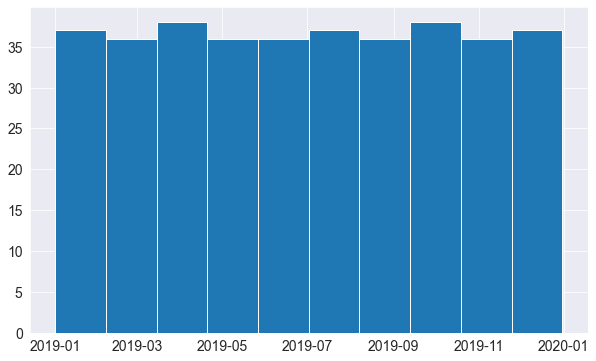

In [22]:
plt.hist(df19['Date']);

From the beginning of the year it was 37 and it fluctuated minutely over the next 11 months. By december it was back to 37.

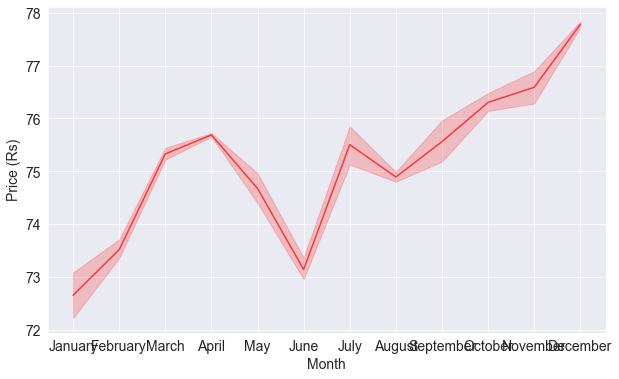

In [23]:
sns.lineplot(data= df19, x="Month", y="Price (Rs)", alpha=0.7, color="red");

During the first few months prices rose until it fell drastically. From June it arose again and has been climbing higher till december.

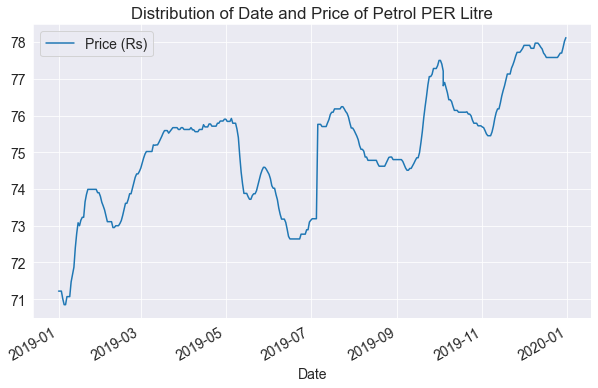

In [24]:
df19.plot(x="Date", y="Price (Rs)")
plt.title('Distribution of Date and Price of Petrol PER Litre');

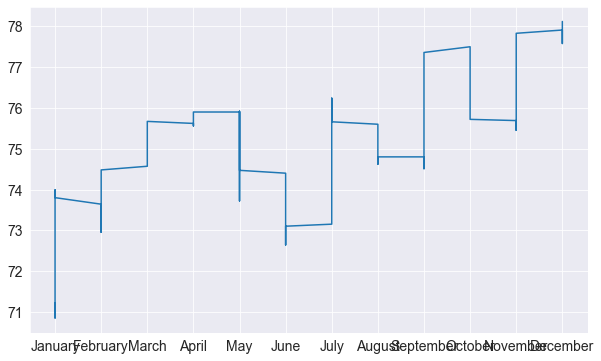

In [25]:
plt.plot(df19['Month'],df19['Price (Rs)']);

During 2019 the petrol prices were highly erratic and random due to various factors.

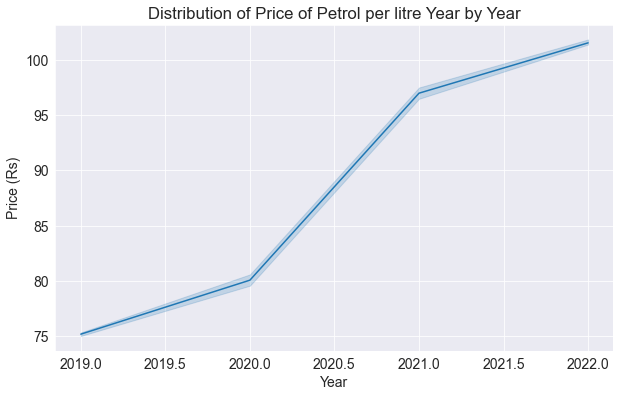

In [26]:
sns.lineplot(data= df, x="Year",y="Price (Rs)")
plt.title("Distribution of Price of Petrol per litre Year by Year");

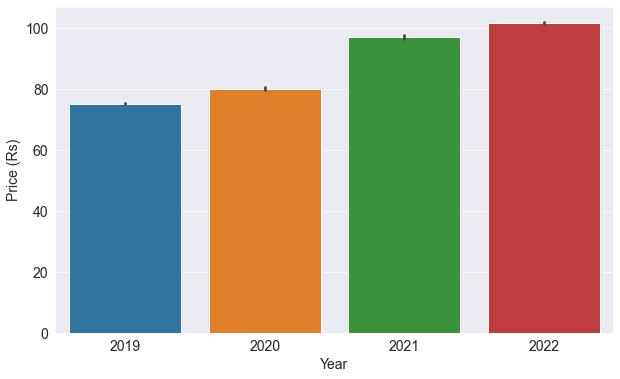

In [27]:
sns.barplot(data=df, x="Year", y="Price (Rs)");

Prices generally rising year after year.

# Year 2020:

In [28]:
df20 = df[df['Year'] == 2020]

In [29]:
df20.head()

,Date,Price (Rs),Year,Day,Week,Month,dayname
367,2020-01-01,78.12,2020,1,1,January,Wednesday
368,2020-01-02,78.20,2020,2,1,January,Thursday
369,2020-01-03,78.28,2020,3,1,January,Friday
370,2020-01-04,78.39,2020,4,1,January,Saturday
371,2020-01-05,78.48,2020,5,1,January,Sunday


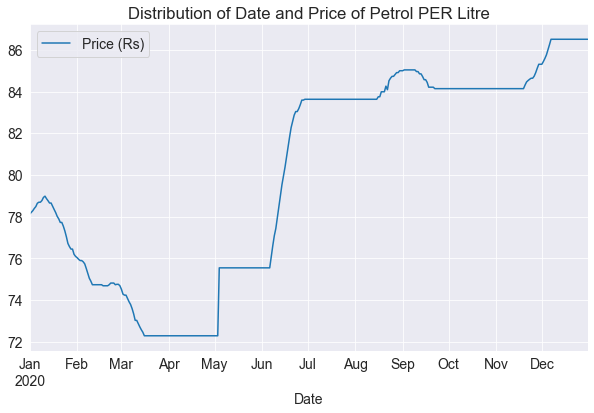

In [30]:
df20.plot(x="Date", y="Price (Rs)")
plt.title('Distribution of Date and Price of Petrol PER Litre');

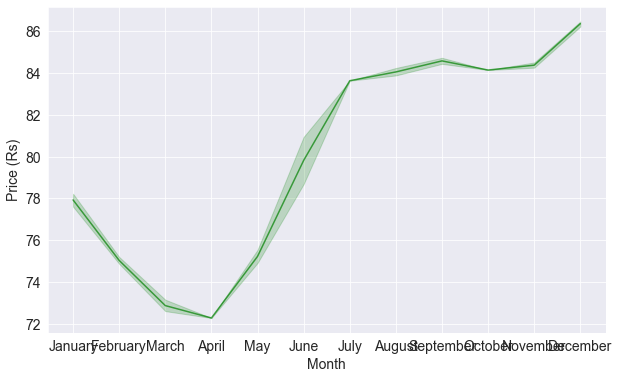

In [31]:
sns.lineplot(data= df20, x="Month", y="Price (Rs)", alpha=0.7, color="green");

In [32]:
# checking for max rate
df20.max()

Date          2020-12-31 00:00:00
Price (Rs)                  86.51
Year                         2020
Day                            31
Week                           53
Month                   September
dayname                 Wednesday
dtype: object

In [33]:
df20.min()

Date          2020-01-01 00:00:00
Price (Rs)                  72.28
Year                         2020
Day                             1
Week                            1
Month                       April
dayname                    Friday
dtype: object

In [34]:
df20['Price (Rs)'].mean()

80.04816939890696

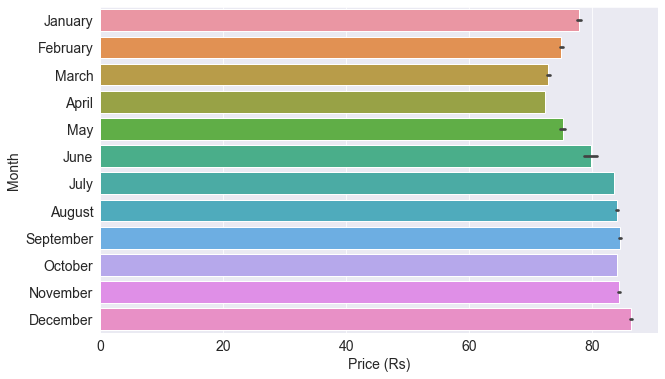

In [35]:
sns.barplot(data=df20, x="Price (Rs)", y="Month");

# Year 2021:

In [36]:
df21= df[df['Year'] == 2021]

In [37]:
df21.head()

,Date,Price (Rs),Year,Day,Week,Month,dayname
733,2021-01-01,86.51,2021,1,53,January,Friday
734,2021-01-02,86.51,2021,2,53,January,Saturday
735,2021-01-03,86.51,2021,3,53,January,Sunday
736,2021-01-04,86.51,2021,4,1,January,Monday
737,2021-01-05,86.51,2021,5,1,January,Tuesday


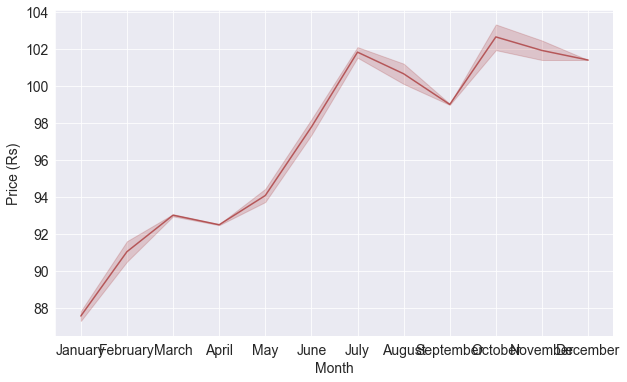

In [38]:
sns.lineplot(data= df21, x="Month", y="Price (Rs)", alpha=0.7, color="brown");

In [39]:
df21.max()

Date          2021-12-31 00:00:00
Price (Rs)                 106.66
Year                         2021
Day                            31
Week                           53
Month                   September
dayname                 Wednesday
dtype: object

In [40]:
df21.min()

Date          2021-01-01 00:00:00
Price (Rs)                  86.51
Year                         2021
Day                             1
Week                            1
Month                       April
dayname                    Friday
dtype: object

In [41]:
df21['Price (Rs)'].mean()

96.99213698630169

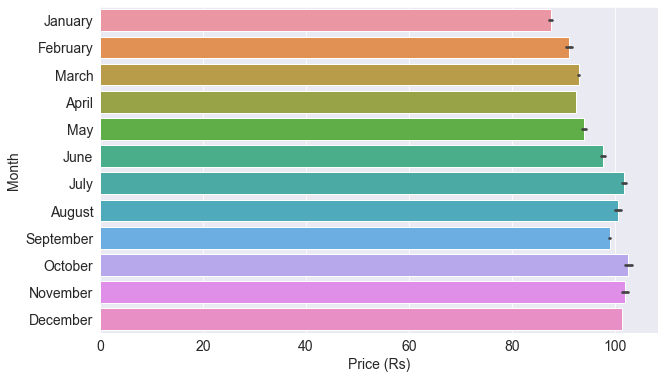

In [42]:
sns.barplot(data=df21, x="Price (Rs)", y="Month");

# Year 2022

In [43]:
df22 = df[df['Year'] == 2022]
df22.head()

,Date,Price (Rs),Year,Day,Week,Month,dayname
1098,2022-01-01,101.4,2022,1,52,January,Saturday
1099,2022-01-02,101.4,2022,2,52,January,Sunday
1100,2022-01-03,101.4,2022,3,1,January,Monday
1101,2022-01-04,101.4,2022,4,1,January,Tuesday
1102,2022-01-05,101.4,2022,5,1,January,Wednesday


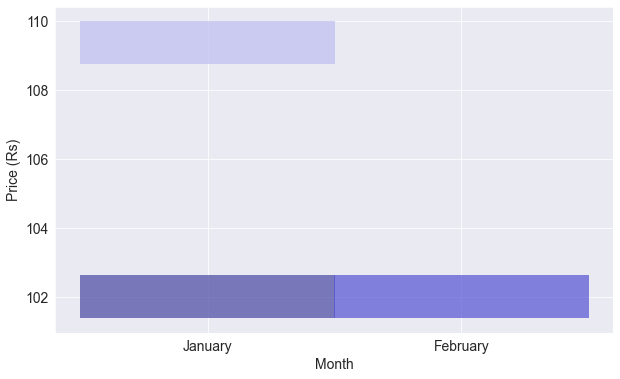

In [44]:
sns.histplot(data= df22, x="Month", y="Price (Rs)", alpha=0.7, color="blue");

In [45]:
df22.max()

Date          2022-02-25 00:00:00
Price (Rs)                 109.98
Year                         2022
Day                            31
Week                           52
Month                     January
dayname                 Wednesday
dtype: object

In [46]:
df22['Price (Rs)'].mean()

101.55321428571423

In [47]:
df22.min()

Date          2022-01-01 00:00:00
Price (Rs)                  101.4
Year                         2022
Day                             1
Week                            1
Month                    February
dayname                    Friday
dtype: object

In [48]:
# Highest petrol rate  from 2019 to 2022 
df['Price (Rs)'].max()

109.98

In [49]:
df[df['Price (Rs)']==109.98]

,Date,Price (Rs),Year,Day,Week,Month,dayname
1112,2022-01-15,109.98,2022,15,2,January,Saturday


In [50]:
# Lowest petrol Price from 2019 to 2022

df['Price (Rs)'].min()

70.85

In [51]:
df[df['Price (Rs)']==70.85]

,Date,Price (Rs),Year,Day,Week,Month,dayname
4,2019-01-05,70.85,2019,5,1,January,Saturday
5,2019-01-06,70.85,2019,6,1,January,Sunday


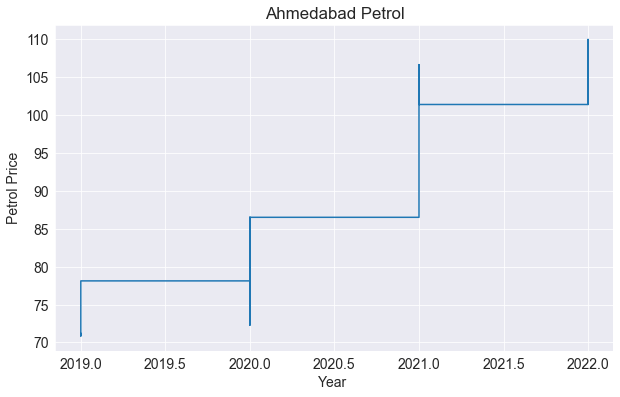

In [52]:
# Visualization of Petrol Price from 2019 to 2022

plt.plot(df['Year'],df['Price (Rs)'])
plt.title("Ahmedabad Petrol")
plt.ylabel('Petrol Price')
plt.xlabel("Year ")
plt.show()

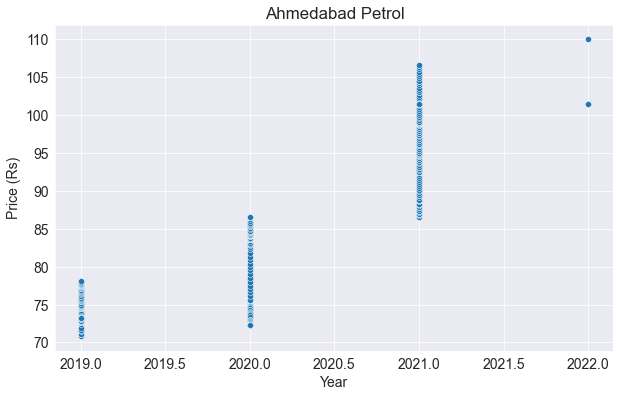

In [53]:
sns.scatterplot(x='Year',y='Price (Rs)',data=df)
plt.title("Ahmedabad Petrol")
plt.show()

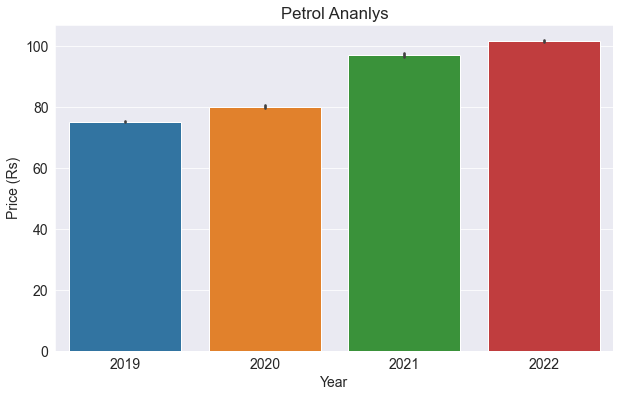

In [54]:
sns.barplot(x='Year',y='Price (Rs)',data=df)
plt.title("Petrol Ananlys")
plt.show()

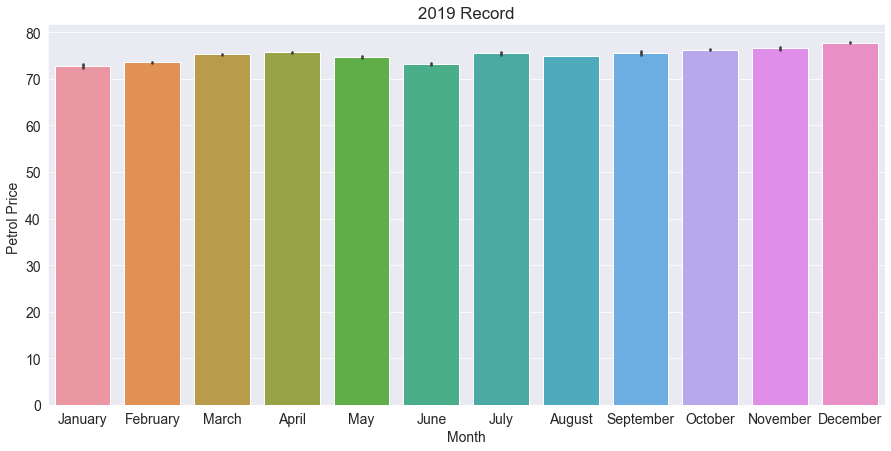

In [55]:
# Visualization of Petrol price in 12 month 2019

plt.figure(figsize=(15, 7))
sns.barplot(x='Month',y='Price (Rs)',data=df19)
plt.title("2019 Record")
plt.xlabel('Month')
plt.ylabel("Petrol Price ")
plt.show()

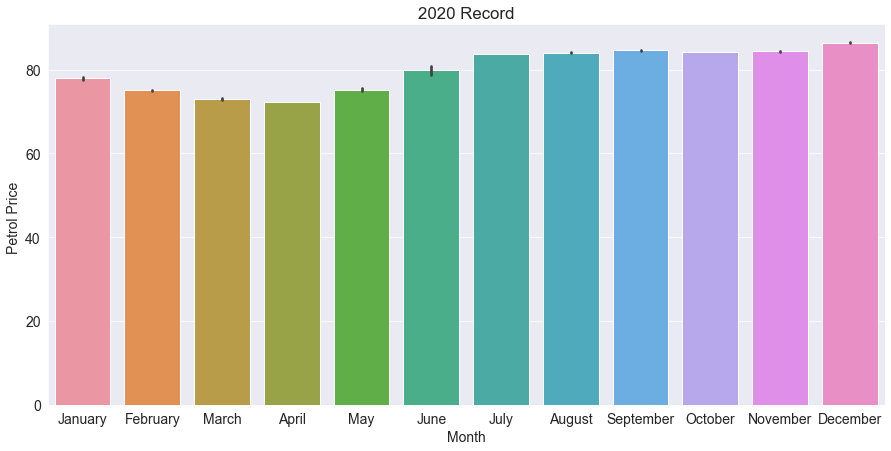

In [56]:
# Visualization of Petrol price in 12 month 2020

plt.figure(figsize=(15, 7))
sns.barplot(x='Month',y='Price (Rs)',data=df20)
plt.title("2020 Record")
plt.xlabel('Month')
plt.ylabel("Petrol Price ")
plt.show()

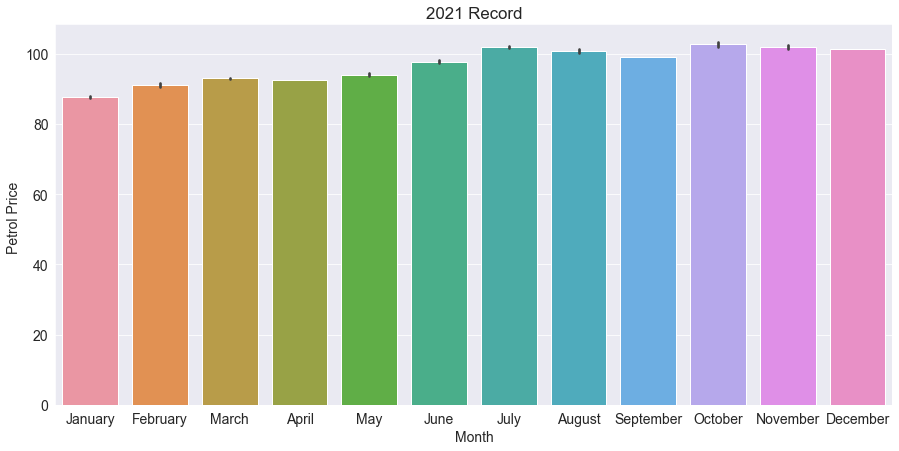

In [57]:
# Visualization of Petrol price in 12 month 2021

plt.figure(figsize=(15, 7))
sns.barplot(x='Month',y='Price (Rs)',data=df21)
plt.title("2021 Record")
plt.xlabel('Month')
plt.ylabel("Petrol Price ")
plt.show()

In [58]:
# Visualization of Petrol price in 12 month 2021

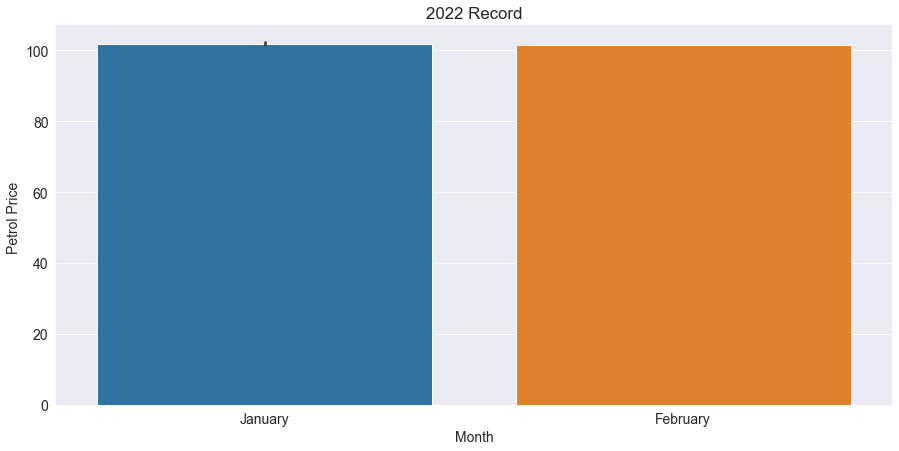

In [59]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Month',y='Price (Rs)',data=df22)
plt.title("2022 Record")
plt.xlabel('Month')
plt.ylabel("Petrol Price ")
plt.show()

# Conclusion:
1) Petrol prices keep rising

2) due to several factors including lockdowns the price keeps fluctuating

3) There may be similar trends in 2022.